In [1]:
import numpy as np
import cv2
import tensorflow as tf
import os
from matplotlib import pyplot as plt
from Dataset import MakeDataset, GetImages
from sklearn.model_selection import train_test_split
from Model import UNET
from tensorflow.keras.layers import Input

Prepare the Dataset

In [2]:
img_size = 128
imgs, masks, labels = MakeDataset((img_size,img_size))

Display one image with the corresponding mask

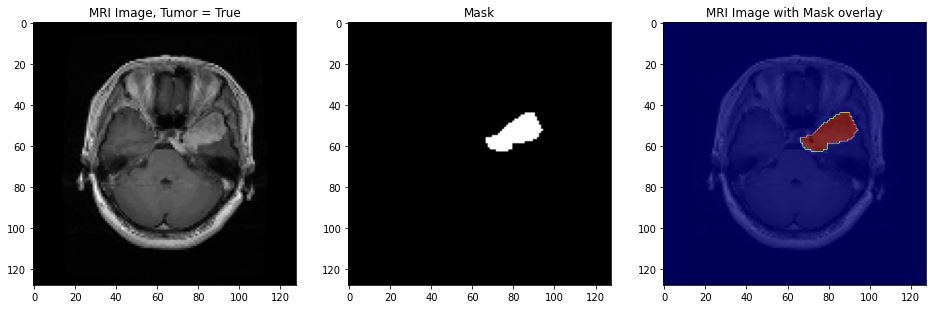

In [3]:
index = 0

fig = plt.figure(figsize=(16, 16))

ax1 = fig.add_subplot(1, 3, 1)
plt.imshow(imgs[index], cmap='gray')

ax2 = fig.add_subplot(1, 3, 2)
plt.imshow(masks[index], cmap='gray')

ax3 = fig.add_subplot(1, 3, 3)
plt.imshow(imgs[index], cmap='gray')
plt.imshow(masks[index], cmap='jet',  alpha=0.7)


ax1.title.set_text('MRI Image, Tumor = ' + str(labels[index]))
ax2.title.set_text('Mask')
ax3.title.set_text('MRI Image with Mask overlay')


Now Normalize the images and split the data in training and validations sets

In [4]:
imgs = imgs / 255.0
masks = masks / 255.0

# Shuffle it since the first 3000 images contain a tumor, while the rest doesn't
x_train, x_test, y_train, y_test = train_test_split(imgs, masks, test_size = 0.2, random_state=40, shuffle=True)

In [5]:
from keras.backend import clear_session
clear_session()

Get the U-NET Model

In [6]:
model = UNET((img_size, img_size, 1), 0.2, 32)
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("braintumor_segmentation.h5", save_best_only=True)
]

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

Train the model

In [7]:
results = model.fit(x_train, y_train, batch_size = 64, epochs = 15, validation_data = (x_test, y_test), callbacks=callbacks)

Epoch 1/15
38/38 [==============================] - 50s 737ms/step - loss: 0.2411 - accuracy: 0.9579 - val_loss: 1.1732 - val_accuracy: 0.9230
Epoch 2/15
38/38 [==============================] - 17s 449ms/step - loss: 0.0984 - accuracy: 0.9924 - val_loss: 0.2209 - val_accuracy: 0.9918
Epoch 3/15
38/38 [==============================] - 27s 720ms/step - loss: 0.0656 - accuracy: 0.9925 - val_loss: 0.1222 - val_accuracy: 0.9921
Epoch 4/15
38/38 [==============================] - 17s 444ms/step - loss: 0.0463 - accuracy: 0.9925 - val_loss: 0.0712 - val_accuracy: 0.9921
Epoch 5/15
38/38 [==============================] - 17s 461ms/step - loss: 0.0330 - accuracy: 0.9929 - val_loss: 0.0824 - val_accuracy: 0.9916
Epoch 6/15
38/38 [==============================] - 15s 403ms/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0523 - val_accuracy: 0.9914
Epoch 7/15
38/38 [==============================] - 21s 561ms/step - loss: 0.0203 - accuracy: 0.9948 - val_loss: 0.0467 - val_accuracy: 0.9901

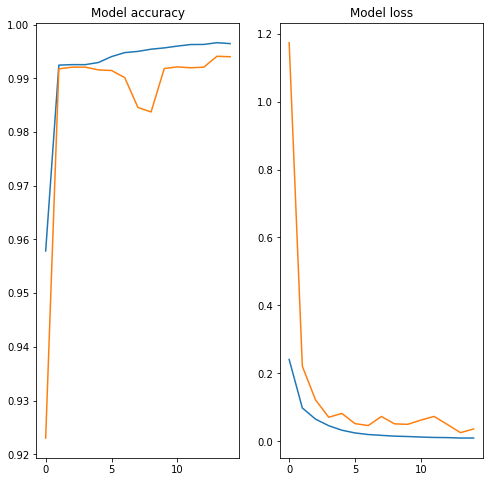

In [8]:

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(1, 2, 1)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

ax2 = fig.add_subplot(1, 2, 2)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])


ax1.title.set_text('Model accuracy')
ax2.title.set_text('Model loss')

In this step, we predict some random images which were not included in the Dataset

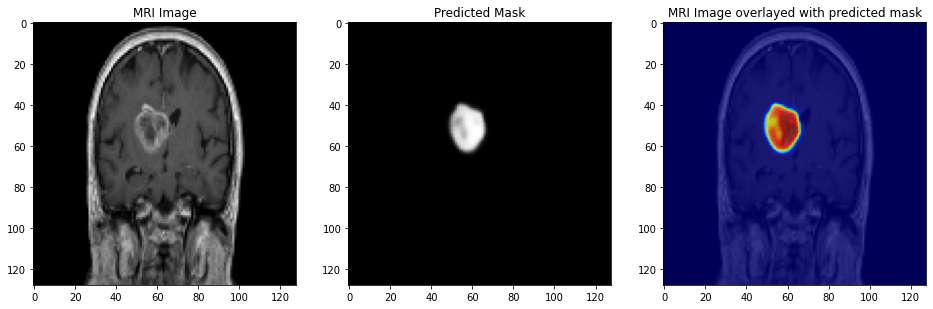

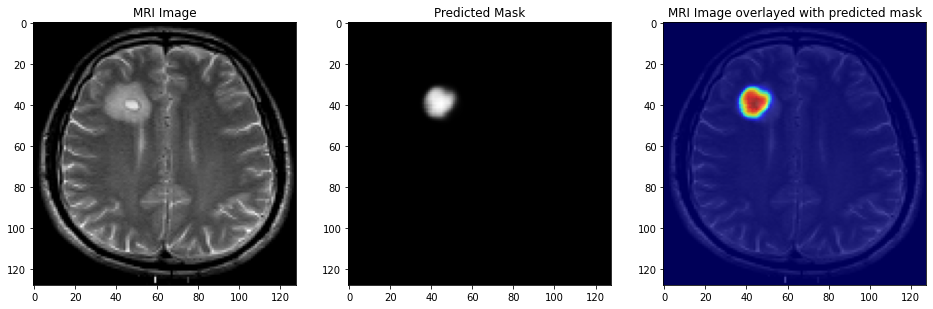

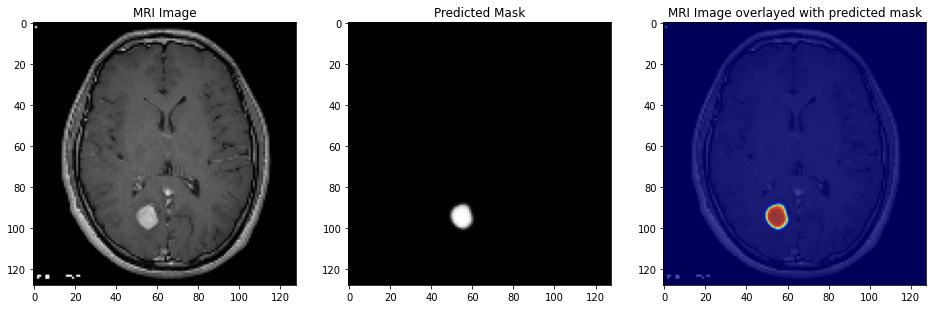

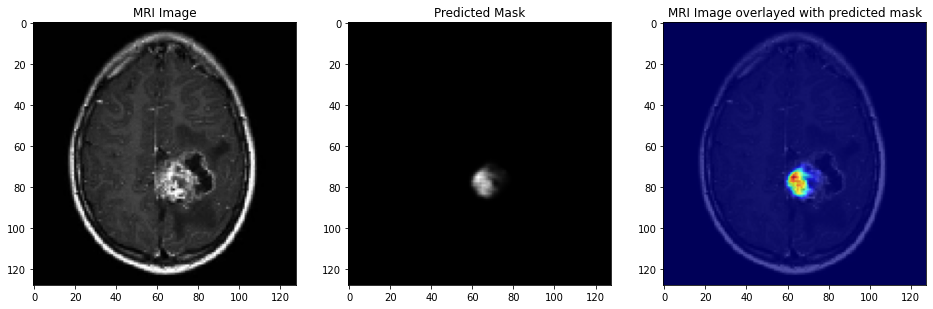

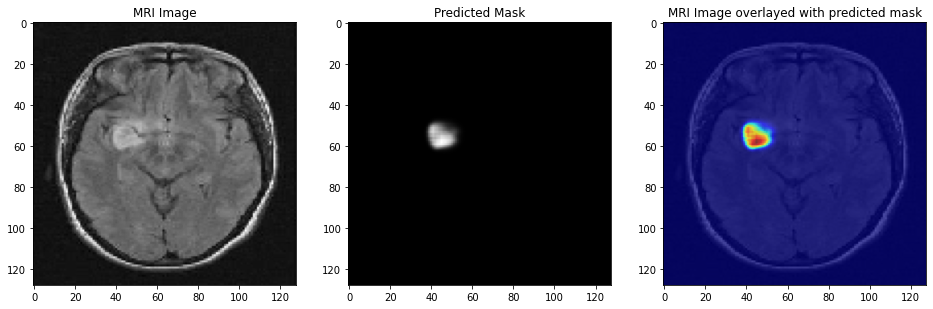

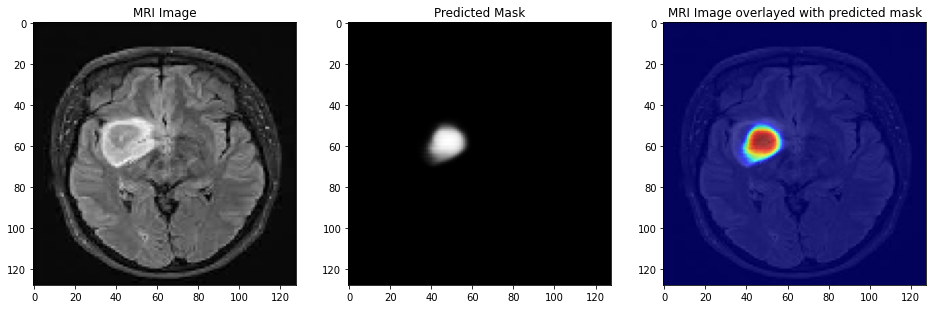

In [27]:
pred_imgs = GetImages('DataSet2/to_predict', (img_size, img_size))

for ind in range(len(pred_imgs)):   
    pred_img = pred_imgs[ind] / 255.0
    prediction = model.predict(pred_img.reshape(1, img_size, img_size, 1))
    prediction = prediction.reshape(img_size, img_size, 1)

    fig = plt.figure(figsize=(16, 16))

    ax1 = fig.add_subplot(1, 3, 1)
    plt.imshow(pred_imgs[ind], cmap='gray')

    ax2 = fig.add_subplot(1, 3, 2)
    plt.imshow(prediction, cmap='gray')

    ax3 = fig.add_subplot(1, 3, 3)
    plt.imshow(pred_imgs[ind], cmap='gray')
    plt.imshow(prediction, cmap='jet',  alpha=0.7)


    ax1.title.set_text('MRI Image')
    ax2.title.set_text('Predicted Mask')
    ax3.title.set_text('MRI Image overlayed with predicted mask')